In [3]:
# Import the necessary libraries.
import pandas as pd
import random
%matplotlib inline
from dataclasses import dataclass
from sensitivity import SensitivityAnalyzer

In [4]:
tr = pd.read_csv('turtle_reviews.csv')


In [8]:
tr.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [9]:
pd.crosstab(tr['gender'], tr['review'])

review,"""A Creativity Tool for Innovators"" is great marketingspeak, but it's a lie.\n\nAfter making a few patterns over the course of a few days, you and your kids will grow bored by this thing. It's more like a toy you'd buy on a lark at a dollar store; ""It looks fun, and it's only a buck.""\n\nAt this price range, I expect some longevity or some real true fun, and this thing provides neither.\n\n***EDIT (three years later)*** -- my two year old boy is now turning five, and he can't get enough of this thing, mostly because it's a BALL THAT ""EXPLODES"" when you throw it or drop it.","... In a little package. My 6 year old loved making little robots with the stickers. I had originally got it to bump my order up to $25 to get free shipping, but I'm glad I got it. Now I want to get the other little sticker books from Dover for my son.","...but may be intimidated by the seemingly endless calculations, and/or may not be able to get a reliable group of players together. I never played D&D for those very reasons, but after doing some research on this game, I found out that you can play solo. There are 13 adventues included, and the replay value is high since the adventures are unfolded differently each time by how the dungeon tiles are shuffled, along with the creature/treasure/encounter cards. The rule book is thankfully thin, and is mostly clear with it's delivery. There are a ton of pieces, but as long as you have some sandwich bags, you should be ok.\n\nSo far I've completed the first adventure, and I like how they didn't throw all of the rules at you (locked doors, for example).\n\nI also like the idea of taking the components from the other 3 games and putting them together for one giant adventure.\n\nI subtracted a star just because the tokens and pieces should have been organized in bags, and some of the rules seem confusing (but not enough to distract the player from having fun).\n\nHighly recommended. I can't wait to try the other 3 games in the series...",100% ok fast shipping as descibed,2 yr old son loves this puzzle nice big pieces!,"2nd copy for me-we ""wore out"" the 1st one!","5 and 3 year old boys love this puzzle. They do it on the floor several times and count the numbers. It's cute, they also love trains so the perfect puzzle for them.","5 stars for the delivery. Got it in 2 days after I ordered it. Wow!! As for the coloring book itself, the pages are perforated and you can see through them and your crayons/ pencils show through to the other side. Putting cardboard or a thick piece of paper in between the pages will avoid that. Drawings are nice and you can put them in your windows when done. Thus the perforated pages and thin paper.",5 year old nephew loved this puzzle. Nice quality and beautiful colors!,8 yr. old grandaughter loved it along with the ideas it gave. Perfect project for her.,...,"was a gift for a high school boy, he liked it.","was useful, but probably better for younger kids","we leave this out and about for visitors (and ourselves) to play with mindlessly. it is a great little conversation piece. made well, definitely recommend.",we play quiddler all the time at our home and the book is great,we still play it. people seem to be pretty polarized about this game. some people really like it and some people really don't.,"well worth the money! I was initially irked that I had to pay so much for some bits of printed paper, but these are sturdy, like a baby's board book, and nice quality! I'm looking forward to getting my other sets to mix and match.","well, we played this game last night at my house. We have all the versions. Our aquire group(4 couples) was countiong the days until we could play the new version. This cardbord copy of the 1999 edition is as entertaining as the original, however it lacks the 3d feel of earlier versions. I personally do not like it as much. This game introduced 2 new things: a tile holder (good Ignovation) and the hotels are 2 pices long instead of 1. However having

In [11]:
tr.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

In [12]:
print(tr)

      gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  produ

In [13]:
tr = tr.drop(['language', 'platform'], axis=1)  


In [14]:
tr.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [16]:
tr = tr.rename(columns={'remuneration (k£)':'renumeration'})

In [17]:
tr.head()

,gender,age,renumeration,spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [18]:
tr = tr.rename(columns={'spending_score (1-100)':'spending_score'})

In [19]:
tr

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [20]:
# Import statsmodel for statistical calculations and 
# ‘TTestIndPower’ class to calculate the parameters.
import statsmodels.stats.api as sms
from statsmodels.stats.power import TTestIndPower

# Specify the three required parameters for the power analysis:
alpha = 0.05 
power = 0.8 
effect = sms.proportion_effectsize(0.13, 0.15) 

# Perform power analysis by using the solve_power() function:
# Specify an instance of ‘TTestIndPower’.
analysis = TTestIndPower() 
# Calculate the sample size and list the parameters.
result = analysis.solve_power(effect, power=power, nobs1=None,
                              ratio=1.0, alpha=alpha) 

# Print the output.
print('Sample Size: %.3f' % result)

Sample Size: 4720.435


In [21]:
# Install the relevant modules:
!pip install scipy

# Import necessary libraries, packages and classes.
import pandas as pd
import math
import numpy as np
import statsmodels.stats.api as sms
import scipy.stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt

In [22]:
tr.info

<bound method DataFrame.info of       gender  age  renumeration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                              

In [24]:
# Import NumPy and Matplotlib.
import numpy as np
import matplotlib.pyplot as plt

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn

from sklearn import datasets 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [27]:
# Replace the missing values with 0.
tr.fillna(0, inplace=True)

In [162]:
X = tr['age'].values.reshape(-1, 1) 
y = tr['loyalty_points'].values 

In [29]:
# Split the data into training = 0.7 and testing = 0.3 subsets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [30]:
# Run linear regression model.
lr = LinearRegression()

In [31]:
# Fit the model on the training data.
lr.fit(x_train, y_train)

LinearRegression()

In [32]:
# Predict is used for predicting on the x_test.
y_pred = lr.predict(x_test)

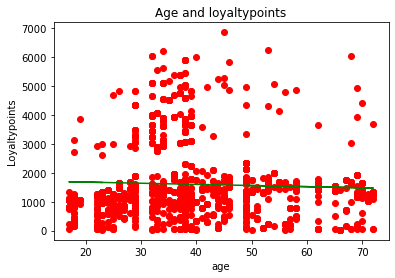

In [33]:
# Visualise the training set.
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, lr.predict(x_train), color = "green")
plt.title("Age and loyaltypoints")
plt.xlabel("age")
plt.ylabel("Loyaltypoints")

plt.show()

In [34]:
print(lr.score(x_test, y_test))

print("Intercept value: ", lr.intercept_)
print("Coefficient value: ", lr.coef_)

-0.001023707993231815
Intercept value:  1754.1189663320997
Coefficient value:  [-3.93692514]


In [169]:
y_predicted = km.fit_predict(tr[['age','loyalty_points']])
y_predicted 

array([0, 0, 0, ..., 1, 2, 0], dtype=int32)

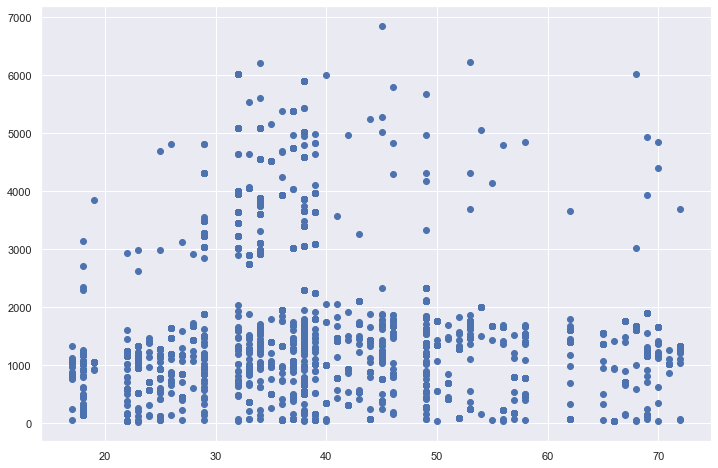

In [171]:
plt.scatter(tr['age'], tr['loyalty_points'])

In [170]:
tr['cluter'] = y_predicted 
tr.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary,cluter
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,0
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,0
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",0
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,0
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,0


In [44]:
from sklearn import linear_model

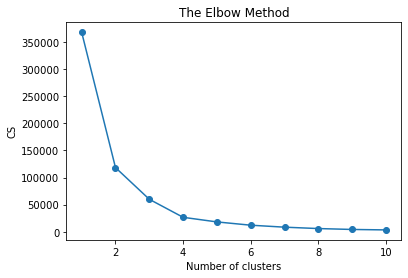

In [49]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

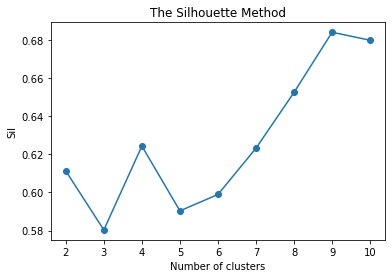

In [52]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(X)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

In [166]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [63]:
# Import all the necessary packages.
import numpy as np
import pandas as pd

import warnings  
warnings.filterwarnings('ignore')

In [64]:
# Import seaborn
import seaborn as sns

In [90]:
# Install NLTK library.
!pip install nltk

# Import the library.
import nltk

# Install the required tokenisation model.
nltk.download('punkt')

# Install the required tokenisation function.
from nltk.tokenize import sent_tokenize



[nltk_data] Downloading package punkt to /Users/audrika/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

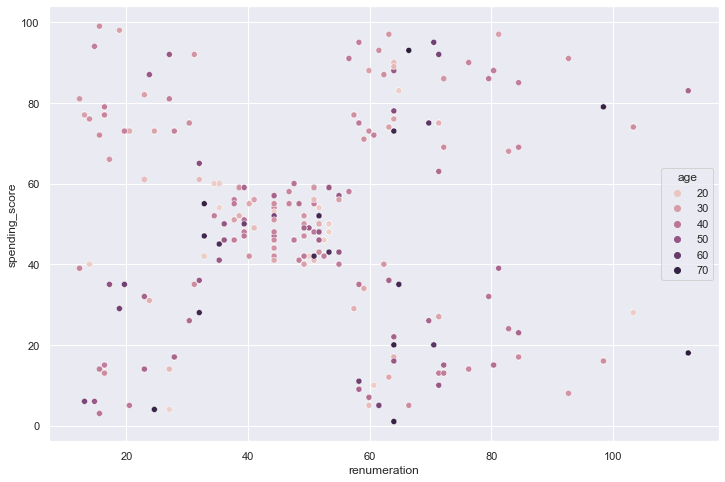

In [84]:
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='renumeration', y='spending_score',
                data=tr, hue= 'age')





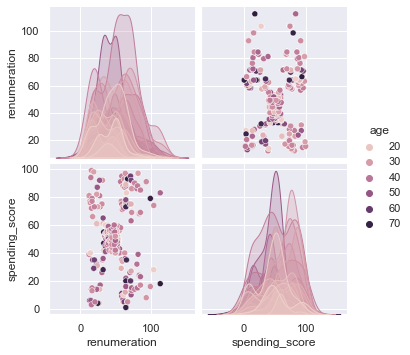

In [87]:
# Create a pairplot with Seaborn.
x = tr[['renumeration', 'spending_score']]

sns.pairplot(tr, vars=x,
             hue='age', diag_kind= 'kde')

In [91]:
tr.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [93]:
# Assign the raw text data to a variable.
text = """Could be better but its still great. I love the things on the DM's side of the screen and I actually like the map in the middle makes it easy to reference whats around at any given time."""
# Tokenise the text data.
tokenized_sentence = sent_tokenize(text)

# Check the result.
print(tokenized_sentence)

['Could be better but its still great.', "I love the things on the DM's side of the screen and I actually like the map in the middle makes it easy to reference whats around at any given time."]


In [94]:
# Import the function.
from nltk.tokenize import word_tokenize

# Tokenise the text data.
tokenized_word = word_tokenize(text)

# Check the result.
print(tokenized_word)

['Could', 'be', 'better', 'but', 'its', 'still', 'great', '.', 'I', 'love', 'the', 'things', 'on', 'the', 'DM', "'s", 'side', 'of', 'the', 'screen', 'and', 'I', 'actually', 'like', 'the', 'map', 'in', 'the', 'middle', 'makes', 'it', 'easy', 'to', 'reference', 'whats', 'around', 'at', 'any', 'given', 'time', '.']


In [95]:
# Import the class.
from nltk.probability import FreqDist

# Create a frequency distribution object.
freq_dist_of_words = FreqDist(tokenized_word)

# Show the five most common elements in the data set.
freq_dist_of_words.most_common(5)

[('the', 5), ('.', 2), ('I', 2), ('Could', 1), ('be', 1)]

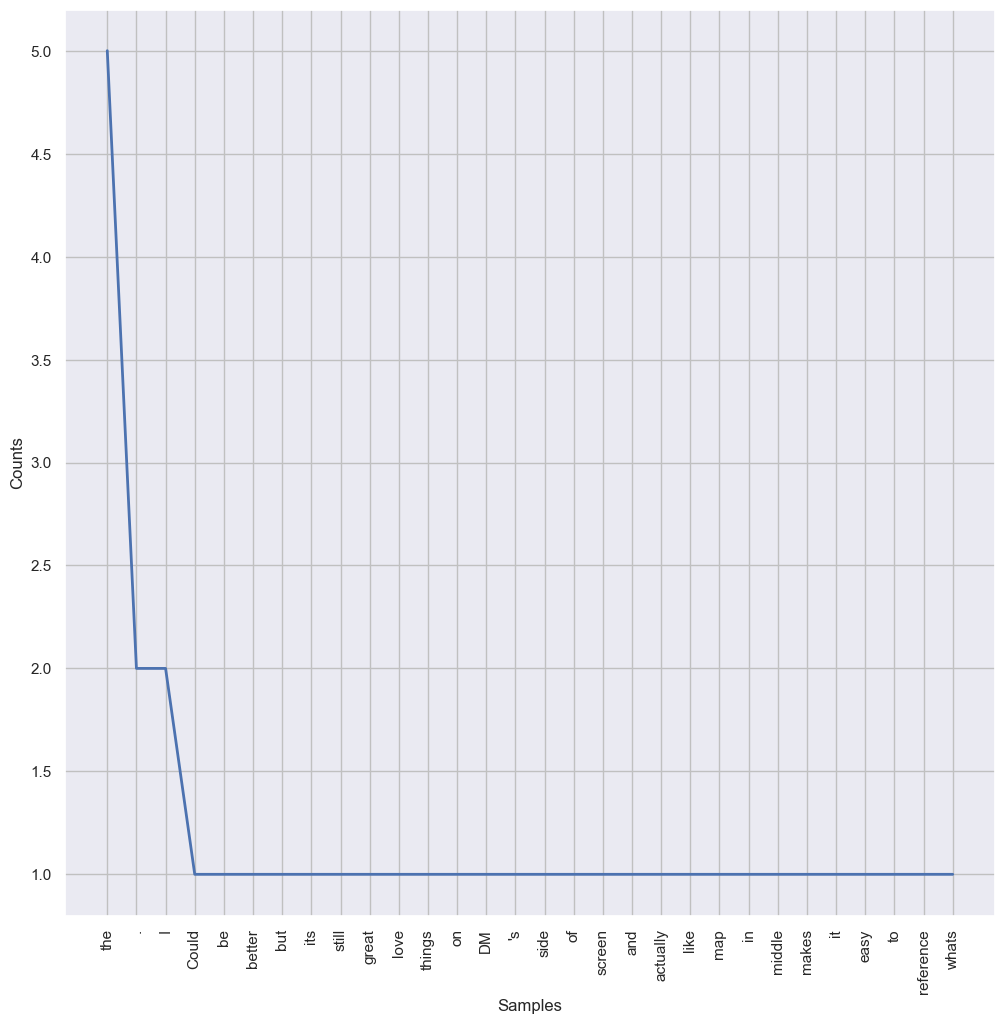

In [96]:
# Import the package.
import matplotlib.pyplot as plt

# Define the figure and axes.
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(12, 12)

# Plot the data set.
freq_dist_of_words.plot(30, cumulative=False)

# Display the result.
plt.show()


In [97]:
# Install vaderSentiment tool.
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 899 kB/s eta 0:00:01


In [98]:
# Import the necessary class.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an object from the class.
sia = SentimentIntensityAnalyzer()

In [103]:
sentences = [
    "Gorgeous, I love the book and the pictures are beautiful!",
    "Awesome! My 8 year old's favorite Xmas gift! It's 9:15 am xmas morning and he's already colored three of these!!",
    "The pictures are great , I've done one and gave it to a friend of mine who likes dragons.",
    "Absolutely great pictures even before coloring!."]

In [104]:
# Apply sentiment analysis.
for sentence in sentences:
    score = sia.polarity_scores(sentence)['compound']
    print(f'The sentiment value of the sentence :"{sentence}" is : {score}')
    # If you insert this line of code, you will have a line break between the outputs.
    print("="*50)

The sentiment value of the sentence :"Gorgeous, I love the book and the pictures are beautiful!" is : 0.9245
The sentiment value of the sentence :"Awesome! My 8 year old's favorite Xmas gift! It's 9:15 am xmas morning and he's already colored three of these!!" is : 0.9036
The sentiment value of the sentence :"The pictures are great , I've done one and gave it to a friend of mine who likes dragons." is : 0.8779
The sentiment value of the sentence :"Absolutely great pictures even before coloring!." is : 0.6893


In [105]:
# Calculate the percentage of the output.
for sentence in sentences:
    print(f'For the sentence "{sentence}"')
    # Calculate the scores.
    polarity = sia.polarity_scores(sentence)
    pos = polarity['pos']
    neu = polarity['neu']
    neg = polarity['neg']
    
    # Display the scores.
    print(f'The percentage of positive sentiment in :"{sentence}" is : {round(pos*100,2)} %')
    print(f'The percentage of neutral sentiment in :"{sentence}" is : {round(neu*100,2)} %')
    print(f'The percentage of negative sentiment in :"{sentence}" is : {round(neg*100,2)} %')
    print("="*50)

For the sentence "Gorgeous, I love the book and the pictures are beautiful!"
The percentage of positive sentiment in :"Gorgeous, I love the book and the pictures are beautiful!" is : 63.9 %
The percentage of neutral sentiment in :"Gorgeous, I love the book and the pictures are beautiful!" is : 36.1 %
The percentage of negative sentiment in :"Gorgeous, I love the book and the pictures are beautiful!" is : 0.0 %
For the sentence "Awesome! My 8 year old's favorite Xmas gift! It's 9:15 am xmas morning and he's already colored three of these!!"
The percentage of positive sentiment in :"Awesome! My 8 year old's favorite Xmas gift! It's 9:15 am xmas morning and he's already colored three of these!!" is : 39.6 %
The percentage of neutral sentiment in :"Awesome! My 8 year old's favorite Xmas gift! It's 9:15 am xmas morning and he's already colored three of these!!" is : 60.4 %
The percentage of negative sentiment in :"Awesome! My 8 year old's favorite Xmas gift! It's 9:15 am xmas morning and he

In [106]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/audrika/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [117]:
nltk.download('stopwords')
nltk.download('words')
from nltk.tokenize import word_tokenize

import nltk
from nltk.corpus import stopwords
from nltk.corpus import words


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/audrika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/audrika/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [118]:
stop_words = set(stopwords.words('english'))

In [121]:
polarity_pd = pd.DataFrame(tr).Tpolarity_pd.sort_values('pos', ascending=0).head(5)


In [107]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia.
review = SentimentIntensityAnalyzer()

In [128]:
tr2 = tr.drop(['renumeration', 'spending_score', 'gender', 'education','product', 'loyalty_points','age'], axis=1)  

In [129]:
tr2

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [132]:
polarity_pd = pd.DataFrame(tr2).T


In [133]:
polarity_pd

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
review,"When it comes to a DM's screen, the space on t...",An Open Letter to GaleForce9*:\n\nYour unpaint...,"Nice art, nice printing. Why two panels are f...",Amazing buy! Bought it as a gift for our new d...,As my review of GF9's previous screens these w...,Grandson loves,"I have bought many gm screens over the years, ...",Came in perfect condition.,Could be better but its still great. I love th...,My review will mirror others in that this kind...,...,Fun for the family. Just make certain you agre...,addicted to this game.,Great game to keep the mind active. We play i...,Gift,We are retired and find this a great way to st...,The perfect word game for mixed ages (with Mom...,Great game. Did not think I would like it whe...,Great game for all.........\nKeeps the mind ni...,fun game!,This game is fun. A lot like scrabble without ...
summary,The fact that 50% of this space is wasted on a...,Another worthless Dungeon Master's screen from...,"pretty, but also pretty useless",Five Stars,Money trap,Five Stars,Best gm screen ever,Five Stars,Great but could be even better,Another missed opportunity. Not a value add t...,...,"Sort of a card game equivalent of Scrabble, an...",Five Stars,Great game to keep the mind active,Gift,A great mind game,The perfect word game for mixed ages (with Mom,Super fun,Great Game,Four Stars,Love this game


In [134]:
all_english_words = set(words.words())


In [139]:
results_list_values = tr2['review'].values


In [140]:
results_list_values

array(["When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.",
       'An Open Letter to GaleForce9*:\n\nYour unpainted miniatures are very not bad. Your spell cards are great. Your board games are "meh". Your DM screens, however, are freaking terrible. I\'m still waiting for a single screen that isn\'t polluted with pointless artwork where useful, reference-able tables should be. Once again, you\'ve created a single use screen that is only useful when running the "Storm King\'s Thunder" adventure. Even despite the fact that it\'s geared to that adventure path, it\'s usefulness negligible, at best. I massive swath of the inner pa

In [143]:
results_list_values_token_nostop =\
[[y.lower() for y in x if y.lower() not in stop_words and y.isalnum() and y.lower() in all_english_words]\
 for x in results_list_values_token]

In [142]:
# Split up each tweet into individual words
results_list_values_token = [word_tokenize(_) for _ in results_list_values]

# View results.
results_list_values_token

[['When',
  'it',
  'comes',
  'to',
  'a',
  'DM',
  "'s",
  'screen',
  ',',
  'the',
  'space',
  'on',
  'the',
  'screen',
  'itself',
  'is',
  'at',
  'an',
  'absolute',
  'premium',
  '.',
  'The',
  'fact',
  'that',
  '50',
  '%',
  'of',
  'this',
  'space',
  'is',
  'wasted',
  'on',
  'art',
  '(',
  'and',
  'not',
  'terribly',
  'informative',
  'or',
  'needed',
  'art',
  'as',
  'well',
  ')',
  'makes',
  'it',
  'completely',
  'useless',
  '.',
  'The',
  'only',
  'reason',
  'that',
  'I',
  'gave',
  'it',
  '2',
  'stars',
  'and',
  'not',
  '1',
  'was',
  'that',
  ',',
  'technically',
  'speaking',
  ',',
  'it',
  'can',
  'at',
  'least',
  'still',
  'stand',
  'up',
  'to',
  'block',
  'your',
  'notes',
  'and',
  'dice',
  'rolls',
  '.',
  'Other',
  'than',
  'that',
  ',',
  'it',
  'drops',
  'the',
  'ball',
  'completely',
  '.'],
 ['An',
  'Open',
  'Letter',
  'to',
  'GaleForce9',
  '*',
  ':',
  'Your',
  'unpainted',
  'miniatures',
  

In [144]:
results_list_values_token_nostop[3]

['amazing', 'buy', 'bought', 'gift', 'new', 'perfect']

In [146]:
results_list_values_token_nostop_polarity =\
{" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in results_list_values_token_nostop}

In [147]:
polarity_pd = pd.DataFrame(results_list_values_token_nostop_polarity).T


In [148]:
polarity_pd

,neg,neu,pos,compound
comes screen space screen absolute premium fact space wasted art terribly informative art well completely useless reason gave technically speaking least still stand block dice ball completely,0.347,0.596,0.057,-0.8932
open letter unpainted bad spell great board however terrible still waiting single screen polluted pointless useful tables single use screen useful running storm king thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted bloated overland map could easily reduced single panel size table short stop making crap,0.243,0.497,0.261,0.3481
nice art nice printing two filled general forgotten map beyond one blue ocean waste understand ca make useful rather solely specific adventure supposed able transpose adventure outside forgotten even list new would least useful map even would stuff related running game stuff related thing curse make useful raven loft undead horror general instead huge amount screen space solely castle useful small fraction time even curse adventure let alone various really kill extended use thinking potential use adventure question well use sense rage screen far useful broad dark covering lot various may suffer map one panel storm one decent tables really mark maybe ask would use,0.231,0.559,0.210,-0.7183
amazing buy bought gift new perfect,0.000,0.224,0.776,0.8860
review previous completely unnecessary nearly useless skip definition waste money,0.423,0.577,0.000,-0.7063
...,...,...,...,...
retired find great way stay alert spelling vocabulary also need use math keep score great game brain,0.000,0.574,0.426,0.8860
perfect word game mixed perhaps giving little help yr old love,0.000,0.355,0.645,0.9137
great game think would like first received turned lot fun play regularly order extra set always travel stuff,0.000,0.532,0.468,0.9062
great game mind nimble,0.000,0.423,0.577,0.6249


In [173]:
polarity_pd.sort_values('pos', ascending=0).head(20)

,neg,neu,pos,compound
fine,0.0,0.0,1.0,0.2023
love helpful,0.0,0.0,1.0,0.7906
cute,0.0,0.0,1.0,0.4588
gift,0.0,0.0,1.0,0.4404
great thank,0.0,0.0,1.0,0.7650
super fun,0.0,0.0,1.0,0.8020
nice,0.0,0.0,1.0,0.4215
satisfied,0.0,0.0,1.0,0.4215
fun enjoyable,0.0,0.0,1.0,0.7351
satisfied thanks,0.0,0.0,1.0,0.6908


In [174]:
polarity_pd.sort_values('neg', ascending=0).head(20)

,neg,neu,pos,compound
difficult,1.000,0.000,0.000,-0.3612
found difficult,0.714,0.286,0.000,-0.3612
cardboard ghost original hard believe shame disgusting,0.703,0.138,0.159,-0.7845
incomplete kit disappointing,0.615,0.385,0.000,-0.4939
anger way discuss anger repetitive start get half round,0.610,0.390,0.000,-0.8555
rather hard year old alone,0.531,0.469,0.000,-0.3400
fun way talk anger identify feel angry,0.490,0.280,0.231,-0.5719
really like game recognize anger talk difficult,0.477,0.308,0.215,-0.5279
sorry find product boring frank juvenile,0.474,0.526,0.000,-0.3818
tough get comes die roll like game,0.454,0.336,0.210,-0.4404


In [151]:
polarity_pd['compound'].describe()

count    1893.000000
mean        0.630927
std         0.366197
min        -0.957600
25%         0.493900
50%         0.757900
75%         0.895700
max         0.998700
Name: compound, dtype: float64

<AxesSubplot:>

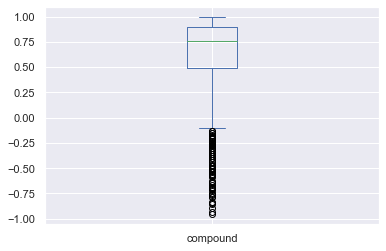

In [152]:

%matplotlib inline
import matplotlib.pyplot as plt

# The boxplot is a nice way to see how many values sit on the edges as outliers.
_plot = polarity_pd.reset_index()['compound'].sort_values()
_plot.plot(kind='box')

In [153]:
polarity_pd['pos'].describe()

count    1893.000000
mean        0.432900
std         0.229002
min         0.000000
25%         0.282000
50%         0.419000
75%         0.593000
max         1.000000
Name: pos, dtype: float64

In [154]:
polarity_pd['neg'].describe()

count    1893.000000
mean        0.049046
std         0.092182
min         0.000000
25%         0.000000
50%         0.000000
75%         0.073000
max         1.000000
Name: neg, dtype: float64

(array([150.,  29.,  83., 162., 231., 228., 191., 198., 164., 143., 117.,
         91.,  47.,  27.,  32.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <BarContainer object of 15 artists>)

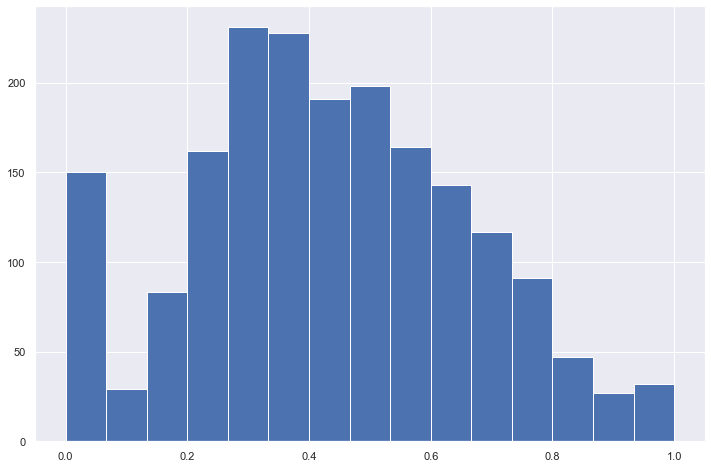

In [175]:
plt. hist(polarity_pd['pos'], bins=15)

(array([1.389e+03, 2.360e+02, 1.280e+02, 7.100e+01, 3.100e+01, 1.700e+01,
        1.200e+01, 4.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <BarContainer object of 15 artists>)

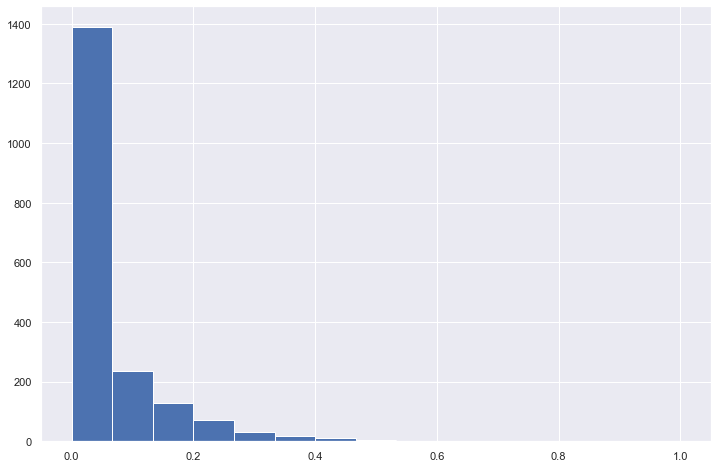

In [176]:
plt. hist(polarity_pd['neg'], bins=15)

(array([ 36.,  29.,  51., 109., 136., 190., 208., 249., 229., 242., 171.,
         85.,  36.,  13., 109.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <BarContainer object of 15 artists>)

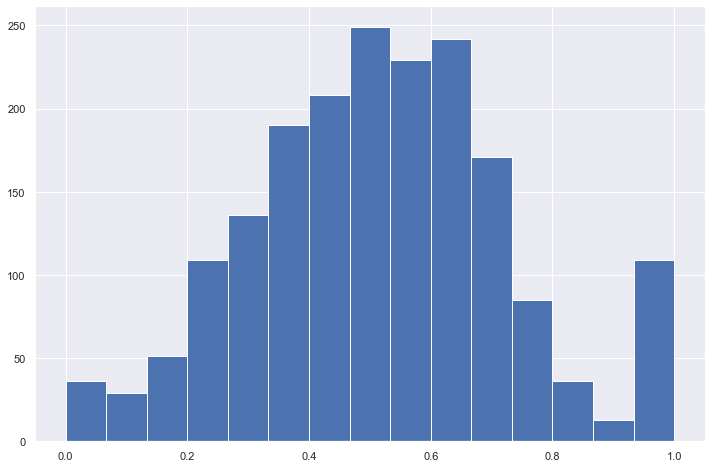

In [177]:
plt. hist(polarity_pd['neu'], bins=15)